<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/Simple%20Chest%20XRay/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [25]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [30]:
# #data_path = "/content/drive/MyDrive/Harvard_Chest_XRay/"
data_path = "/content/drive/MyDrive/IMD_project/chest_xray"
# #data_path = "/content/drive/My Drive/NIH_Chest_XRay/"

sample_ratio = 1
batch_size = 96
num_epochs = 20

In [31]:

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [32]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**

In [33]:
%run "/content/drive/MyDrive/IMD_project/Medical-Image-Diagnosis-using-Convolutional-Neural-Networks-main/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio)

**MODEL TRAINING**

In [34]:
# Define the AlexNet model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.classifier[6] = nn.Linear(4096, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "AlexNet", num_epochs)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


Epoch 1/20: 100%|██████████| 43/43 [04:58<00:00,  6.94s/batch, Accuracy=0.772, Loss=0.521, Precision=0.732, Recall=0.632, F1 Score=0.647]


VALIDATION: Accuracy: 0.8737 | Loss: 0.3595 | Recall: 0.8859 | Precision: 0.8246 | F-score: 0.8456



Epoch 2/20: 100%|██████████| 43/43 [01:11<00:00,  1.66s/batch, Accuracy=0.901, Loss=0.2, Precision=0.813, Recall=0.754, F1 Score=0.775]


VALIDATION: Accuracy: 0.9300 | Loss: 0.1833 | Recall: 0.9185 | Precision: 0.8987 | F-score: 0.9080



Epoch 3/20: 100%|██████████| 43/43 [01:12<00:00,  1.68s/batch, Accuracy=0.938, Loss=0.212, Precision=0.852, Recall=0.81, F1 Score=0.827]


VALIDATION: Accuracy: 0.8686 | Loss: 0.3657 | Recall: 0.7350 | Precision: 0.9193 | F-score: 0.7791



Epoch 4/20: 100%|██████████| 43/43 [01:12<00:00,  1.68s/batch, Accuracy=0.945, Loss=0.218, Precision=0.873, Recall=0.84, F1 Score=0.854]


VALIDATION: Accuracy: 0.9676 | Loss: 0.1240 | Recall: 0.9434 | Precision: 0.9684 | F-score: 0.9551



Epoch 5/20: 100%|██████████| 43/43 [01:12<00:00,  1.69s/batch, Accuracy=0.961, Loss=0.128, Precision=0.89, Recall=0.862, F1 Score=0.874]


VALIDATION: Accuracy: 0.9505 | Loss: 0.1499 | Recall: 0.9555 | Precision: 0.9205 | F-score: 0.9360



Epoch 6/20: 100%|██████████| 43/43 [01:13<00:00,  1.71s/batch, Accuracy=0.96, Loss=0.234, Precision=0.9, Recall=0.876, F1 Score=0.887]


VALIDATION: Accuracy: 0.9659 | Loss: 0.1151 | Recall: 0.9493 | Precision: 0.9580 | F-score: 0.9535



Epoch 7/20: 100%|██████████| 43/43 [01:13<00:00,  1.72s/batch, Accuracy=0.967, Loss=0.134, Precision=0.909, Recall=0.888, F1 Score=0.898]


VALIDATION: Accuracy: 0.9369 | Loss: 0.1579 | Recall: 0.8786 | Precision: 0.9508 | F-score: 0.9078



Epoch 8/20: 100%|██████████| 43/43 [01:15<00:00,  1.75s/batch, Accuracy=0.971, Loss=0.17, Precision=0.916, Recall=0.897, F1 Score=0.906]


VALIDATION: Accuracy: 0.9676 | Loss: 0.1004 | Recall: 0.9598 | Precision: 0.9535 | F-score: 0.9566



Epoch 9/20: 100%|██████████| 43/43 [01:15<00:00,  1.77s/batch, Accuracy=0.973, Loss=0.349, Precision=0.922, Recall=0.905, F1 Score=0.913]


VALIDATION: Accuracy: 0.9471 | Loss: 0.1415 | Recall: 0.9064 | Precision: 0.9489 | F-score: 0.9252



Epoch 10/20: 100%|██████████| 43/43 [01:16<00:00,  1.78s/batch, Accuracy=0.973, Loss=0.13, Precision=0.926, Recall=0.911, F1 Score=0.918]


VALIDATION: Accuracy: 0.9744 | Loss: 0.0969 | Recall: 0.9783 | Precision: 0.9557 | F-score: 0.9663



Epoch 11/20: 100%|██████████| 43/43 [01:16<00:00,  1.79s/batch, Accuracy=0.978, Loss=0.0287, Precision=0.931, Recall=0.916, F1 Score=0.923]


VALIDATION: Accuracy: 0.9727 | Loss: 0.0899 | Recall: 0.9585 | Precision: 0.9674 | F-score: 0.9628



Epoch 12/20: 100%|██████████| 43/43 [01:16<00:00,  1.78s/batch, Accuracy=0.981, Loss=0.173, Precision=0.934, Recall=0.921, F1 Score=0.928]


VALIDATION: Accuracy: 0.9693 | Loss: 0.0859 | Recall: 0.9562 | Precision: 0.9606 | F-score: 0.9584



Epoch 13/20: 100%|██████████| 43/43 [01:15<00:00,  1.77s/batch, Accuracy=0.983, Loss=0.132, Precision=0.938, Recall=0.926, F1 Score=0.932]


VALIDATION: Accuracy: 0.9693 | Loss: 0.0842 | Recall: 0.9703 | Precision: 0.9499 | F-score: 0.9595



Epoch 14/20: 100%|██████████| 43/43 [01:15<00:00,  1.76s/batch, Accuracy=0.98, Loss=0.162, Precision=0.941, Recall=0.929, F1 Score=0.935]


VALIDATION: Accuracy: 0.9744 | Loss: 0.0784 | Recall: 0.9620 | Precision: 0.9686 | F-score: 0.9652



Epoch 15/20: 100%|██████████| 43/43 [01:17<00:00,  1.80s/batch, Accuracy=0.98, Loss=0.0716, Precision=0.943, Recall=0.932, F1 Score=0.938]


VALIDATION: Accuracy: 0.9727 | Loss: 0.0809 | Recall: 0.9585 | Precision: 0.9674 | F-score: 0.9628



Epoch 16/20: 100%|██████████| 43/43 [01:17<00:00,  1.81s/batch, Accuracy=0.987, Loss=0.0319, Precision=0.946, Recall=0.935, F1 Score=0.94]


VALIDATION: Accuracy: 0.9693 | Loss: 0.0914 | Recall: 0.9726 | Precision: 0.9484 | F-score: 0.9597



Epoch 17/20: 100%|██████████| 43/43 [01:19<00:00,  1.85s/batch, Accuracy=0.99, Loss=0.202, Precision=0.948, Recall=0.939, F1 Score=0.943]


VALIDATION: Accuracy: 0.9727 | Loss: 0.1019 | Recall: 0.9749 | Precision: 0.9543 | F-score: 0.9640



Epoch 18/20: 100%|██████████| 43/43 [01:19<00:00,  1.85s/batch, Accuracy=0.989, Loss=0.0566, Precision=0.951, Recall=0.941, F1 Score=0.946]


VALIDATION: Accuracy: 0.9676 | Loss: 0.1003 | Recall: 0.9645 | Precision: 0.9501 | F-score: 0.9570



Epoch 19/20: 100%|██████████| 43/43 [01:19<00:00,  1.84s/batch, Accuracy=0.979, Loss=0.086, Precision=0.952, Recall=0.943, F1 Score=0.947]


VALIDATION: Accuracy: 0.9727 | Loss: 0.0864 | Recall: 0.9608 | Precision: 0.9652 | F-score: 0.9630



Epoch 20/20: 100%|██████████| 43/43 [01:21<00:00,  1.90s/batch, Accuracy=0.988, Loss=0.188, Precision=0.954, Recall=0.945, F1 Score=0.949]


VALIDATION: Accuracy: 0.9744 | Loss: 0.0892 | Recall: 0.9737 | Precision: 0.9590 | F-score: 0.9660



In [35]:
torch.save(model.state_dict(), "{}alexnet.pth".format(data_path))


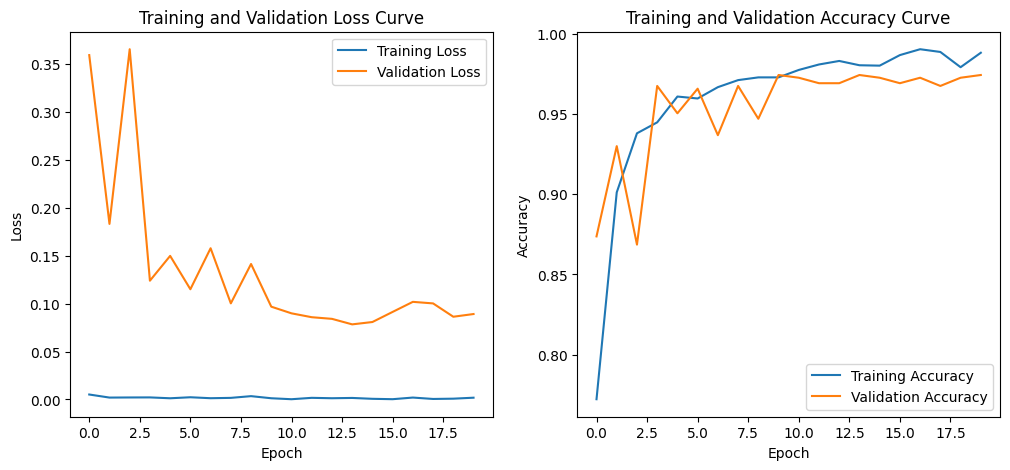

In [37]:
#Plotting the Loss and Accuracy Curves
plot_model_curves()

TEST: Accuracy: 0.9624 | Loss: 0.1105 | Recall: 0.9492 | Precision: 0.9548 | F-score: 0.9519



<Figure size 800x800 with 0 Axes>

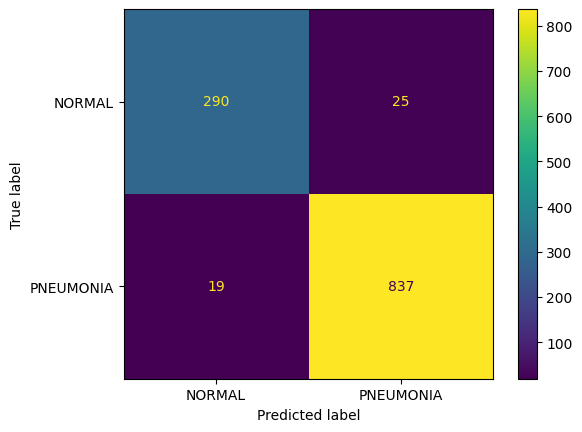

In [38]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "AlexNet")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


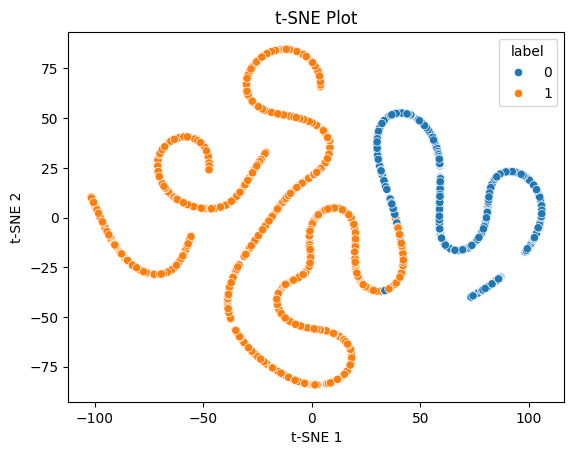

In [39]:
#Obtain the TSNE Plot
plot_TSNE(train_loader, device, model)

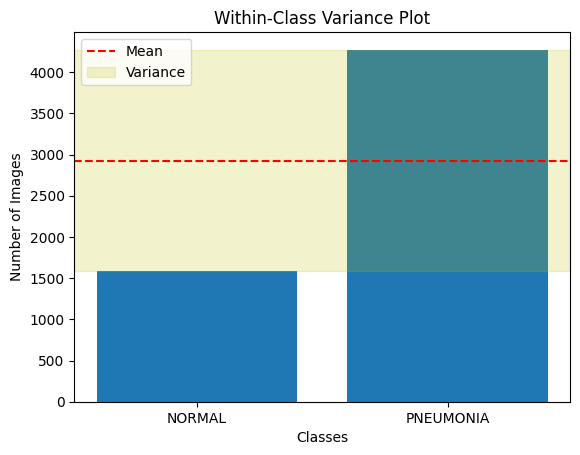

In [40]:
#Plot the Within-Class Variance of the dataset
plot_within_class_variance(dataset)

In [41]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# --------------------------
# 1. Paths
# --------------------------
MODEL_PATH = "/content/drive/MyDrive/IMD_project/chest_xrayalexnet.pth"
IMG_PATH = "/content/drive/MyDrive/IMD_project/20390.jpg"   # <-- change to your test image

# --------------------------
# 2. Class names (IMPORTANT)
# --------------------------
# Change this according to your dataset labels
class_names = ["NORMAL", "PNEUMONIA"]   # example for chest X-ray dataset

# --------------------------
# 3. Load model
# --------------------------
model = models.alexnet(pretrained=False)
model.classifier[6] = nn.Linear(4096, len(class_names))  # adjust final layer

# Load weights
model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device('cpu')))
model.eval()

# --------------------------
# 4. Preprocessing (same used during training)
# --------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --------------------------
# 5. Predict function
# --------------------------
def predict_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)  # add batch dimension

    with torch.no_grad():
        output = model(img_tensor)
        _, pred = torch.max(output, 1)

    predicted_class = class_names[pred.item()]
    return predicted_class

# --------------------------
# 6. Run prediction
# --------------------------
prediction = predict_image(IMG_PATH)
print("Predicted Class:", prediction)


Predicted Class: PNEUMONIA
